In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
from scipy.stats import poisson as poisson1 #there maybe a clash of packacges depending on the kernel used, 
#so I import poisson function with another name

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Assignment 1: Test the Z test:

(all simulated data)

1. Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

2. Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

Grading:

you must:

a. plot your original distribution

b. plot at least one of the samples

c. plot the distribution of z statistics

d. fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

e. find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

f. plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).

In [2]:
#For reproducible research
np.random.seed(88)

#setting lambda, size and iterations
mylambda=69
size=1000
iterations=1000

#creating a dataframe of 0 to fill in iterations
m_media=np.zeros(iterations)

#creating a dataframe of means
for i in range(iterations):
    sample=(np.random.poisson(mylambda,size))
    m_media[i]=sample.mean()

    
    

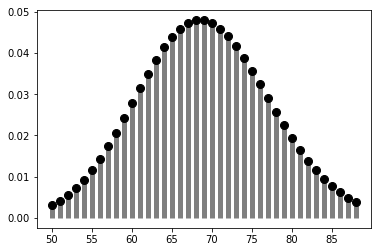

In [3]:
#Creating an idealized distribution of a poisson with 69 lambda

fig, ax = plt.subplots(1, 1)
mu=69

x = np.arange(poisson1.ppf(0.01, mu),
              poisson1.ppf(0.99, mu))
ax.plot(x, poisson1.pmf(x, mu), 'bo', color="black",ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson1.pmf(x, mu), colors='black', lw=5, alpha=0.5);

**Figure 0.** Idealized Poisson Distribution with lambda=69

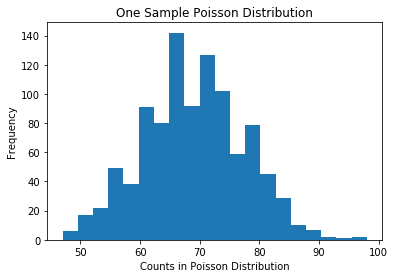

In [4]:
#Creating plot of ONE poisson sample
pl.hist(np.random.poisson(mylambda,size), bins=20)
pl.title("One Sample Poisson Distribution")
pl.xlabel("Counts in Poisson Distribution")
pl.ylabel("Frequency");

**Figure 1.** This is ONE Poisson sample distribution with Lambda=69 and N=1000

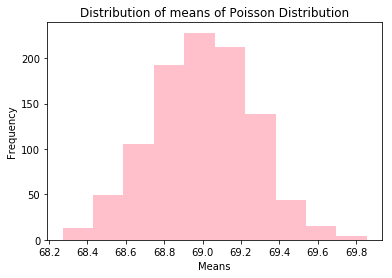

In [5]:
#Creating plot of means
pl.hist(m_media, color="pink")
pl.title("Distribution of means of Poisson Distribution")
pl.xlabel("Means")
pl.ylabel("Frequency");

**Figure 2.** This is the distribution of means for 1000 Poisson Distribution

In [6]:
#calculating z distribution for all the means
z_dist=(mylambda - m_media) * np.sqrt(size)/np.sqrt(mylambda)


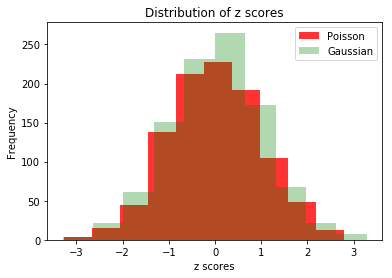

In [7]:
#Creating plot of z-score and gaussian distribution
pl.hist(z_dist,  alpha=0.8,label="Poisson",color="red")
pl.hist(np.random.normal(0,1,size), color="green", alpha=0.3,label="Gaussian")
pl.title("Distribution of z scores")
pl.legend()
pl.xlabel("z scores")
pl.ylabel("Frequency");

**Figure 3.** This is the distribution of z scores for 1000 means for Poisson Distribution.

### The following statistical tests will be assessed with an $\alpha\ $of 0.5

In [8]:
#KS statistic
sp.stats.kstest(z_dist,"norm")

KstestResult(statistic=0.021023804912636557, pvalue=0.7686941804443933)

In [9]:
#Anderson statistic
sp.stats.anderson(z_dist,"norm")

AndersonResult(statistic=0.16989591193168962, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### Interpretation

Both the KS test and Anderson Test were not significant: 
The pvalue of the KS test is over the critical value of 0.5.

The statistic for anderson is below the critical value of 0.784 (corresponding to a 0.5. significance).

What this test are assessing are if the two distributions in question (normal and poisson z scores) come from the same parent distribution. The Null Hypothesys that they come from the same parent distribution is not rejected, so, they we can assume that the z-score has a normal distribution with mean 0 and standard deviation of 1.